### What is OpenCV2?

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/OpenCV_Logo_with_text_svg_version.svg" width="150"/>

It is an **open source** library for real-time **computer vision**

In [50]:
   pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [51]:
import cv2 as cv

We know how to use a library in python the first thing we have to do is importing the package.

It is conventional to import `OpenCV2` with the alias `cv`, obviously it is not required.

In [131]:
img = cv.imread("shapes.png", cv.IMREAD_COLOR)

Use [`cv.imread`](https://docs.opencv.org/4.3.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) to load an image.

The first argument is the path of the image, the second one tells opencv how to load the image, where the most commonly used values are [`cv.IMREAD_COLOR`](https://docs.opencv.org/4.3.0/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822), [`cv.IMREAD_GRAYSCALE`](https://docs.opencv.org/4.3.0/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80ae29981cfc153d3b0cef5c0daeedd2125) or [`cv.IMREAD_UNCHANGED`](https://docs.opencv.org/4.3.0/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80aeddd67043ed0df14f9d9a4e66d2b0708).


But what does `cv.imread` produce?

In [56]:
type(img)

numpy.ndarray

`imread` returns a [`NumPy`](https://numpy.org/) [`ndarray`](https://numpy.org/doc/stable/reference/arrays.ndarray.html).

[`NumPy`](https://numpy.org/) is a library which is part of [`SciPy`](https://www.scipy.org/) project, with the aim of providing a smart and powerful system to work with multidimensional matrices.

In [58]:
img.ndim

3

`ndim` method of NumPy array returns the number of matrix dimensions. 

Our matrix has `3` dimensions, this makes sense: two dimensions are the height and the width of the image, the third is represented by color's channels of each pixel.

In [60]:
img.shape

(865, 1311, 3)

`shape` method returns a tuple of the size of the matrix of each dimension.

The first two are image's height and width, `3` is the number of color's channels. Does **RGB** ring a bell?

In [62]:
img.dtype

dtype('uint8')

Last interesting thing about NumPy's array.

`dtype` method returns the type of data composing the array.


So, in our image each channel of each pixel is identified by an `unsigned integer` of `8bit`, thus the image's color depth is `8bit`.

Little question: What about the `shape` of a `grayscale` image?

In [65]:
cv.imread("shapes.png", cv.IMREAD_GRAYSCALE).shape

(865, 1311)

The matrix has only two dimensions, because each pixel is characterized by only one value.

In [67]:
img

array([[[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       ...,

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]]

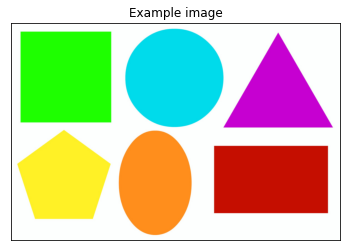

In [135]:

from matplotlib import pyplot as plt

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#img_rgb = img
plt.imshow(img_rgb)
# without this we will see ticks like in a graph
plt.xticks([]), plt.yticks([])
plt.title("Example image")
plt.show()

As we see the result is the same, but there is a small difference.

In the code we spot [`cv.cvtColor`](https://docs.opencv.org/4.3.0/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). It converts the image from an encoding to another one.

As we have already said, an image (without any compression) is only a matrix of pixels, each pixel is composed by one or more numbers which determine its color. Often, the pixels are composed by three values **R**ed **G**reen and **B**lue (in this order), this is the codification that is used by `matplotlib`.

`OpenCV` uses as default the encoding **B**lue **G**reen **R**ed. Why? Because of reasons; Intel's guys are funny people 🤗

In [73]:
def show(image, is_bgr=True):
    if(is_bgr):
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()

We defined `show` function so, for the rest of the file, we can use it to visualize images.

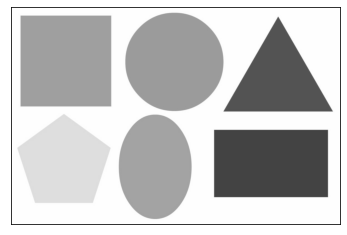

In [75]:
import cv2 as cv
from matplotlib import pyplot as plt

img_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def show(image, is_bgr=True):
    if(is_bgr):
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()
      
show(img_g)

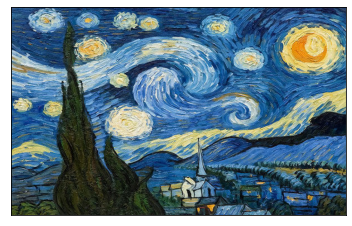

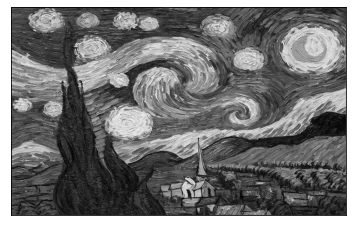

In [76]:
starry_night_img = cv.imread("starry_night.jpg", cv.IMREAD_COLOR)
starry_night_img_g = cv.cvtColor(starry_night_img, cv.COLOR_BGR2GRAY)


show(starry_night_img)
show(starry_night_img_g)

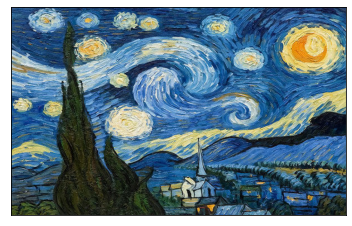

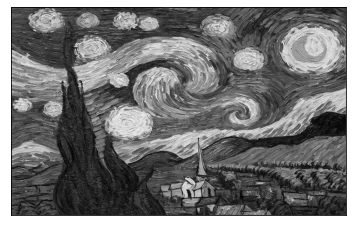

In [77]:
import cv2 as cv
import matplotlib.pyplot as plt

def show(image, is_bgr=True):
    if(is_bgr):
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()

starry_night_img = cv.imread("starry_night.jpg", cv.IMREAD_COLOR)
starry_night_img_g = cv.cvtColor(starry_night_img, cv.COLOR_BGR2GRAY)


show(starry_night_img)
show(starry_night_img_g)

We converted the image to gray scale, then we showed it with our custom function `show`.

Obviously, we can also save an image after we have done some edits.

In [80]:
cv.imwrite("shapes_b.png", img_g)

True

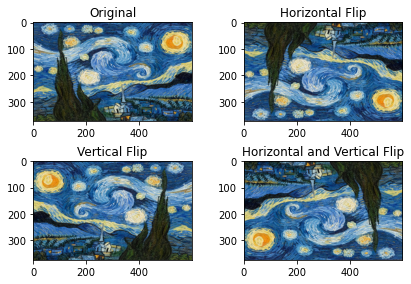

In [141]:
import cv2
import matplotlib.pyplot as plt

starry_night_img = cv.imread("starry_night.jpg", cv.IMREAD_COLOR)
# Convert BGR to RGB
starry_night_img_rgb = cv2.cvtColor(starry_night_img, cv2.COLOR_BGR2RGB)

# Create subplots in a 2x2 grid
plt.subplot(2, 2, 1)
plt.imshow(starry_night_img_rgb)
plt.title('Original')

# Display horizontally flipped image
flip_horizontal = cv2.flip(starry_night_img, 0)
flip_horizontal_rgb = cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 2)
plt.imshow(flip_horizontal_rgb)
plt.title('Horizontal Flip')

# Display vertically flipped image
flip_vertical = cv2.flip(starry_night_img, 1)
flip_vertical_rgb = cv2.cvtColor(flip_vertical, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 3)
plt.imshow(flip_vertical_rgb)
plt.title('Vertical Flip')

# Display horizontally and vertically flipped image
flip_both = cv2.flip(starry_night_img, -1)
flip_both_rgb = cv2.cvtColor(flip_both, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 4)
plt.imshow(flip_both_rgb)
plt.title('Horizontal and Vertical Flip')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()


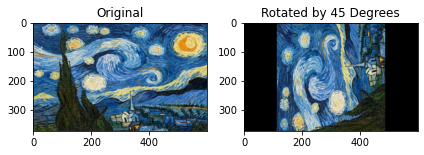

In [137]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read image
img = cv.imread("starry_night.jpg", cv.IMREAD_COLOR)
(h, w) = img.shape[:2]  # height and width of image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

# define the point of rotation, e.g., (w/2, h/2) i.e., center of the image
(cX, cY) = (w/2, h/2)
# define rotation matrix with 45 degrees of rotation
rotation_matrix = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)

# rotate and plot the image
rotated = cv2.warpAffine(img, rotation_matrix, (w, h))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated by 45 Degrees')

plt.tight_layout()
plt.show()


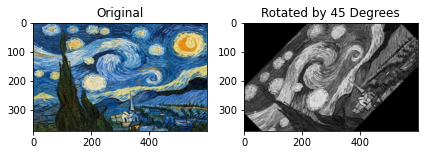

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read image
img = cv.imread("starry_night.jpg", cv.IMREAD_COLOR)
(h, w) = img.shape[:2]  # height and width of image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

# define the point of rotation, e.g., (w/2, h/2) i.e., center of the image
(cX, cY) = (w/2, h/2)
starry_night_img_g = cv.cvtColor(starry_night_img, cv.COLOR_BGR2GRAY)
# define rotation matrix with 45 degrees of rotation
rotation_matrix = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)

# rotate and plot the image
rotated = cv2.warpAffine(starry_night_img_g, rotation_matrix, (w, h))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated by 45 Degrees')

plt.tight_layout()
plt.show()


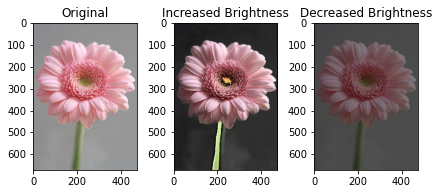

In [143]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read image
flower_img = cv2.imread("flower.png", cv2.IMREAD_COLOR)

# Function to increase brightness
def increase_brightness(image, factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Increase the brightness by scaling the V channel
    hsv[:,:,2] = np.clip(hsv[:,:,2] * factor, 0, 255)
    # Convert back to BGR
    brighter_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return brighter_img

# Function to decrease brightness
def decrease_brightness(image, factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Decrease the brightness by scaling the V channel
    hsv[:,:,2] = np.clip(hsv[:,:,2] / factor, 0, 255)
    # Convert back to BGR
    darker_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return darker_img

# Increase brightness
brighter_flower = increase_brightness(flower_img, 2)

# Decrease brightness
darker_flower = decrease_brightness(flower_img, 2)

# Display original, brighter, and darker images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(flower_img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(brighter_flower, cv2.COLOR_BGR2RGB))
plt.title('Increased Brightness')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(darker_flower, cv2.COLOR_BGR2RGB))
plt.title('Decreased Brightness')

plt.tight_layout()
plt.show()


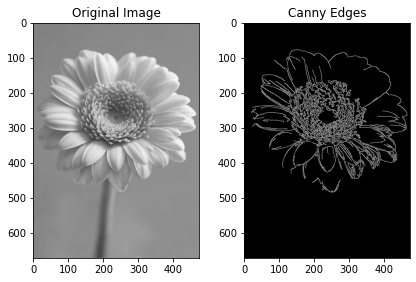

In [101]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("flower.png", cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(img, 50, 150)

# Display the original, blurred, and Canny edges images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.tight_layout()
plt.show()